In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_rows', None) #To display all rows
pd.set_option('display.max_columns', None) # To display all columns

In [2]:
#reading the data

star = pd.read_csv("Input_data.csv")

In [3]:
star.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

Here we can see many features having the null values in the data

In [4]:
star.isnull().sum()

Order                                                            0
Property Id                                                      0
Property Name                                                    0
Parent Property Id                                               0
Parent Property Name                                             0
BBL - 10 digits                                                 11
NYC Borough, Block and Lot (BBL) self-reported                   0
NYC Building Identification Number (BIN)                         0
Address 1 (self-reported)                                        0
Address 2                                                        0
Postal Code                                                      0
Street Number                                                  124
Street Name                                                    122
Borough                                                        118
DOF Gross Floor Area                                          

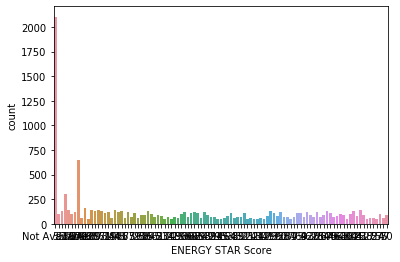

In [5]:
#sns.countplot('ENERGY STAR Score',data=star)

In [6]:
star.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
Order                                                         11746 non-null int64
Property Id                                                   11746 non-null int64
Property Name                                                 11746 non-null object
Parent Property Id                                            11746 non-null object
Parent Property Name                                          11746 non-null object
BBL - 10 digits                                               11735 non-null object
NYC Borough, Block and Lot (BBL) self-reported                11746 non-null object
NYC Building Identification Number (BIN)                      11746 non-null object
Address 1 (self-reported)                                     11746 non-null object
Address 2                                                     11746 non-null object
Postal Code                                          

In [7]:

#In the description we can see the details of the each columns such mean,count,std

star.describe()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,11746.000000,11746.000000,11746.000000,1.174600e+04,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1948.738379,1.289971,98.762557,1.673739e+05,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,30.576386,4.017484,7.501603,3.189238e+05,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,1600.000000,0.000000,0.000000,0.000000e+00,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,1927.000000,1.000000,100.000000,6.699400e+04,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,1941.000000,1.000000,100.000000,9.408000e+04,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1966.000000,1.000000,100.000000,1.584140e+05,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,2019.000000,161.000000,100.000000,1.421712e+07,40.912869,-73.715543,56.000000,51.000000,155101.000000


In [8]:

# Here we are dropping thee null values.
st= star.dropna()
st.isnull().sum()

Order                                                         0
Property Id                                                   0
Property Name                                                 0
Parent Property Id                                            0
Parent Property Name                                          0
BBL - 10 digits                                               0
NYC Borough, Block and Lot (BBL) self-reported                0
NYC Building Identification Number (BIN)                      0
Address 1 (self-reported)                                     0
Address 2                                                     0
Postal Code                                                   0
Street Number                                                 0
Street Name                                                   0
Borough                                                       0
DOF Gross Floor Area                                          0
Primary Property Type - Self Selected   


In the below code we are trying to differentiate the data with the help of the energy score. We have divide grades as below.

In [9]:
star.loc[star['ENERGY STAR Score'] >= "85", 'output'] = 'A'  
star.loc[(star['ENERGY STAR Score'] < "85")& (star['ENERGY STAR Score'] >= "70"),'output'] = 'B'  
star.loc[(star['ENERGY STAR Score'] < "70")& (star['ENERGY STAR Score'] >= "55"),'output'] = 'C' 
star.loc[star['ENERGY STAR Score'] < "55" ,'output'] = 'D'
star.loc[star['ENERGY STAR Score'] == "Not Available", 'output'] = 'E' 

In [10]:
star["output"].unique()

array(['E', 'C', 'A', 'D', 'B'], dtype=object)

In [11]:
star.head(50)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA,output
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...,E
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...,C
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...,E
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan

EDA

Here I am applying the pair plot to check the relation between the dataset and distribution. Although data is huge and we do not have feature specification. Data having high varience and many fields are empty/not added proper values.
many filelds carry the big numbers, these kind of data leads to the wrong direction or we will get the low accuracy.

That's trying to understand something about the data

In [12]:
#sns.pairplot(star,hue = 'output')

In [13]:
#sns.jointplot(x='output',y='Occupancy',data=star,kind='reg')

In below count plot we can see the most of the building having the score less than 50%. that's why they are in the column "D".
That also shows that so many buildings needs some serious attention.

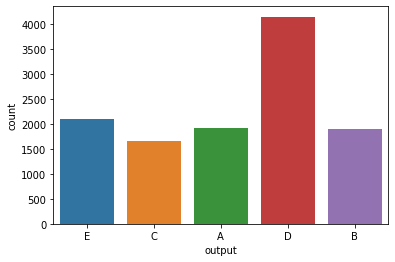

In [14]:
sns.countplot('output',data=star)

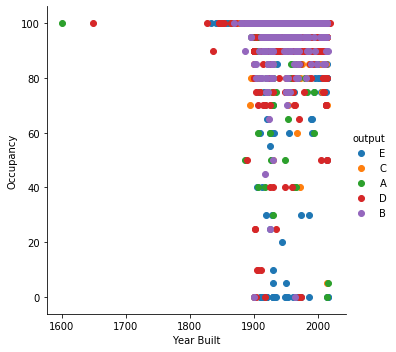

In [15]:
#Here we can see that most of the building built in 1900 to 2000 and most of the building occupancy is 100.

sns.FacetGrid(star,hue="output",size=5).map(plt.scatter,"Year Built","Occupancy").add_legend();
plt.show()

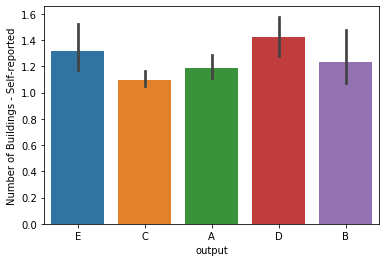

In [16]:
sns.barplot(x='output',y='Number of Buildings - Self-reported',data=star)

## Metered Areas (Energy)

0. Another configuration 
1. Common Area Cooling, Tenant Plug Load/Electricity, Tenant Cooling, Common Area Plug Load/Electricity
2. Tenant Plug Load/Electricity, Common Area Cooling, Tenant Cooling, Common Area Plug Load/Electricity
3. Common areas only
4. Tenant areas only
5. Not Available
6. Tenant Cooling, Common Area Hot Water, Common Area Heating, Common Area Plug Load/Electricity
7. Whole building.

Here we have applied the label encoder to convert the data into the numeric values to get the more detil information.
In below code we can see the "whole building" feature having most of the occurance almost 97% percent of the data.
Data is baised



In [17]:
star['Metered Areas (Energy)'].value_counts()

Whole Building                                                                                          11648
Not Available                                                                                              57
Another configuration                                                                                      31
Common areas only                                                                                           6
Tenant areas only                                                                                           1
Common Area Cooling, Tenant Plug Load/Electricity, Tenant Cooling, Common Area Plug Load/Electricity        1
Tenant Plug Load/Electricity, Common Area Cooling, Tenant Cooling, Common Area Plug Load/Electricity        1
Tenant Cooling, Common Area Hot Water, Common Area Heating, Common Area Plug Load/Electricity               1
Name: Metered Areas (Energy), dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
star['Energy_consumption'] = LE.fit_transform(star['Metered Areas (Energy)'])

star['Energy_consumption'].head()

0    7
1    7
2    3
3    3
4    3
Name: Energy_consumption, dtype: int32

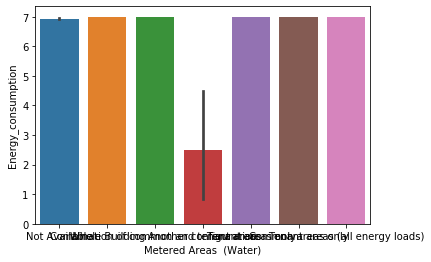

In [19]:
sns.barplot(x='Metered Areas  (Water)',y='Energy_consumption',data=star,orient='H')

Here we can see our output feature which we have dervive after the feature enginnering. Here we have divided into the 5 feature and all types of building/infrastructure is having the maximum consumption of water of water

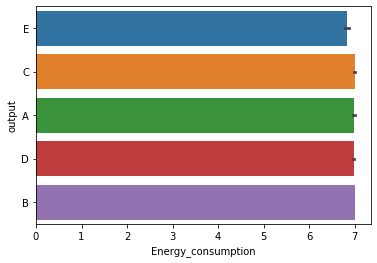

In [20]:
sns.barplot(x='Energy_consumption',y='output',data=star)

In [21]:
star['Metered Areas (Energy)'].value_counts()

Whole Building                                                                                          11648
Not Available                                                                                              57
Another configuration                                                                                      31
Common areas only                                                                                           6
Tenant areas only                                                                                           1
Common Area Cooling, Tenant Plug Load/Electricity, Tenant Cooling, Common Area Plug Load/Electricity        1
Tenant Plug Load/Electricity, Common Area Cooling, Tenant Cooling, Common Area Plug Load/Electricity        1
Tenant Cooling, Common Area Hot Water, Common Area Heating, Common Area Plug Load/Electricity               1
Name: Metered Areas (Energy), dtype: int64

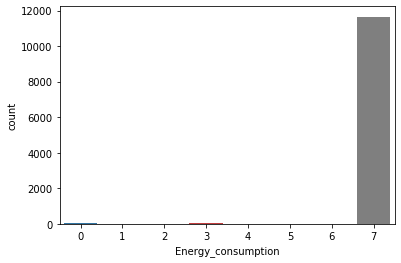

In [22]:
sns.countplot('Energy_consumption',data=star)

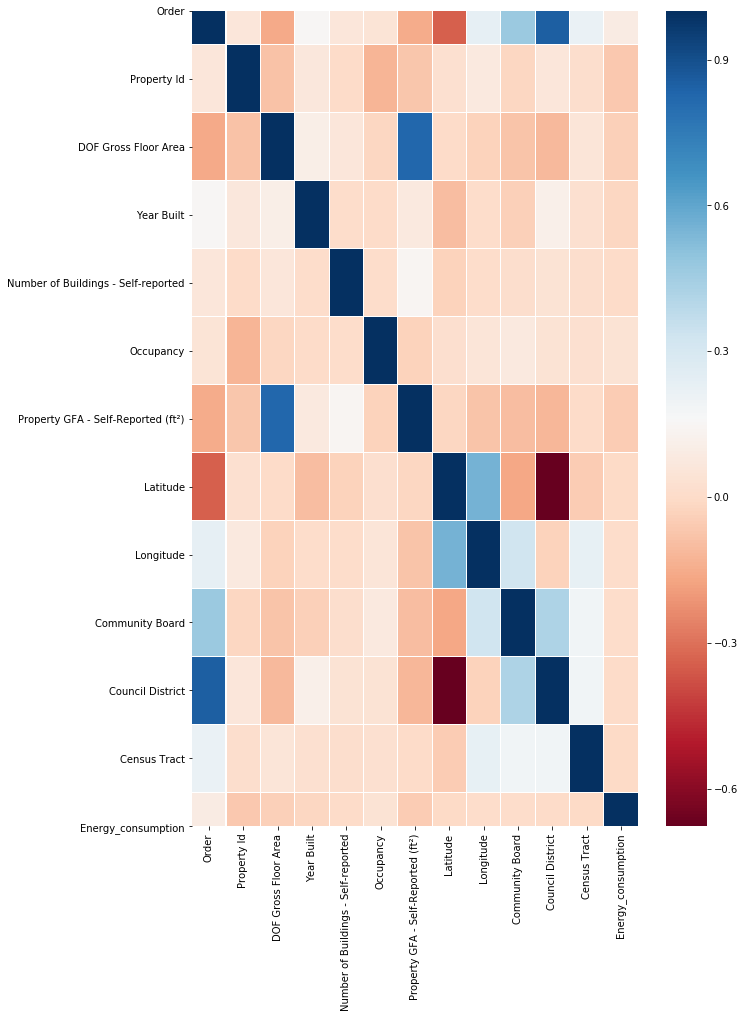

In [23]:
#Coorelation
co_relation=star.corr()
f,ax=plt.subplots(figsize=(10,15))
sns.heatmap(co_relation,ax=ax,cmap="RdBu",linewidths=0.1)

In the below code we have dropped those feature having more null values and missing data and selected some feature to build a model.

More than 80% values are null so these columns doesn't make any sense to keep it.

In [24]:
drop_items = ['NYC Borough, Block and Lot (BBL) self-reported',
            'NYC Building Identification Number (BIN)',
            'BBL - 10 digits',
            'Parent Property Name',
            'Property Name',
            'Address 1 (self-reported)',
            'Address 2',
            'Street Number',
            'Street Name',
            'Latitude',
            'Longitude',
            'DOF Gross Floor Area',
            'DOF Benchmarking Submission Status',
            'List of All Property Use Types at Property',
            'Largest Property Use Type - Gross Floor Area (ft²)',
            '2nd Largest Property Use - Gross Floor Area (ft²)',
            '3rd Largest Property Use Type - Gross Floor Area (ft²)',                     
            'Fuel Oil #1 Use (kBtu)',                                         
            'Fuel Oil #2 Use (kBtu)',                                         
            'Fuel Oil #4 Use (kBtu)',                                         
            'Fuel Oil #5 & 6 Use (kBtu)',                                     
            'Diesel #2 Use (kBtu)',                                           
            'District Steam Use (kBtu)',                                      
            'Natural Gas Use (kBtu)',                                         
            'Weather Normalized Site Natural Gas Use (therms)',               
            'Electricity Use - Grid Purchase (kBtu)',                         
            'Weather Normalized Site Electricity (kWh)',                      
            'Direct GHG Emissions (Metric Tons CO2e)',                        
            'Indirect GHG Emissions (Metric Tons CO2e)',                      
            'Property GFA - Self-Reported (ft²)',                              
            'Water Use (All Water Sources) (kgal)', 
            'Weather Normalized Site EUI (kBtu/ft²)',
            'Weather Normalized Source EUI (kBtu/ft²)'
           ]

star.drop(drop_items, axis = 1, inplace = True)

we have selected the final features. We can add some more features like "largest property", "2 largest property", "Natural gas use".
But these features donn't have data inplace properly, If we replace the "not available" with the 0 then we will not having a vaiance into the data. To add data we need some background.

We finalized data and we will try to clean it.

In [25]:


final_data = ['output',
        'Number of Buildings - Self-reported','Occupancy',
        'Total GHG Emissions (Metric Tons CO2e)',
        'Water Intensity (All Water Sources) (gal/ft²)','Weather Normalized Site Electricity Intensity (kWh/ft²)',
        'Weather Normalized Site Natural Gas Intensity (therms/ft²)','Largest Property Use Type'
        
        ]



In [26]:
star['Largest Property Use Type'] = LE.fit_transform(star['Largest Property Use Type'])
star['Largest Property Use Type'].head()

0    25
1    12
2    12
3    12
4    12
Name: Largest Property Use Type, dtype: int32

We have repplace "Not Available" with the "nan" and "nan" with the zero. In below feature we can see data variance very much high.
We have to take care of those values as well.

In [27]:
#star['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].head()
star['Total GHG Emissions (Metric Tons CO2e)'].replace('Not Available',np.nan,inplace=True)
star['Total GHG Emissions (Metric Tons CO2e)']= star['Total GHG Emissions (Metric Tons CO2e)'].fillna(0)

In [28]:
#star['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].head()
star['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].replace('Not Available',np.nan,inplace=True)
star['Weather Normalized Site Natural Gas Intensity (therms/ft²)']= star['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].fillna(0)

In [29]:
#star['Weather Normalized Site Electricity Intensity (kWh/ft²)'].head()
star['Weather Normalized Site Electricity Intensity (kWh/ft²)'].replace('Not Available',np.nan,inplace=True)
star['Weather Normalized Site Electricity Intensity (kWh/ft²)']= star['Weather Normalized Site Electricity Intensity (kWh/ft²)'].fillna(0)

In [30]:
#star['Water Intensity (All Water Sources) (gal/ft²)'].head(50)
star['Water Intensity (All Water Sources) (gal/ft²)'].replace('Not Available',np.nan,inplace=True)
star['Water Intensity (All Water Sources) (gal/ft²)']= star['Water Intensity (All Water Sources) (gal/ft²)'].fillna(0)

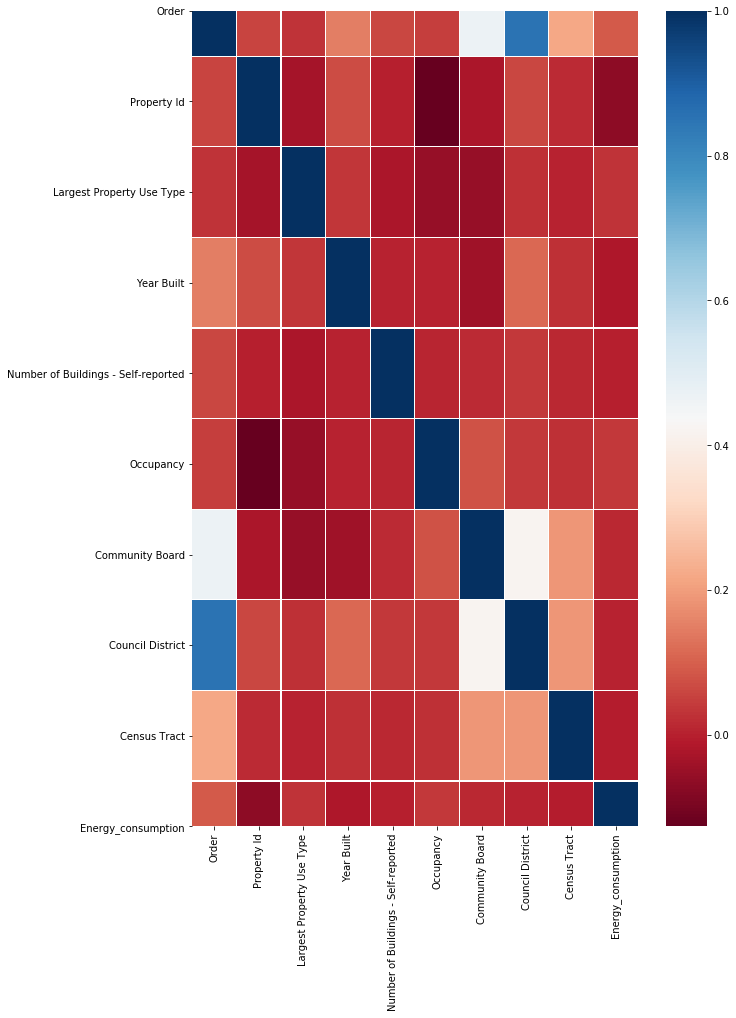

In [31]:
#Coorelation
co_relation=star.corr()
f,ax=plt.subplots(figsize=(10,15))
sns.heatmap(co_relation,ax=ax,cmap="RdBu",linewidths=0.1)

In [32]:
from sklearn.preprocessing import StandardScaler,Normalizer


In [33]:
star=star[final_data] 


In [34]:
star.head(100)

,output,Number of Buildings - Self-reported,Occupancy,Total GHG Emissions (Metric Tons CO2e),Water Intensity (All Water Sources) (gal/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Largest Property Use Type
0,E,2,100,6962.2,0,37.8,0,25
1,C,12,100,55870.4,0,24.8,2.4,12
2,E,1,100,0,0,0,0,12
3,E,1,100,0,0,0,0,12
4,E,1,100,0,0,0,0,12
5,C,12,100,54429.8,0,8.3,4.8,12
6,E,1,60,0,0,0,0,26
7,E,4,100,20943400,39.13,0,1439.7,21
8,E,1,100,21.1,96305.69,319.9,0,26
9,E,1,100,0,0,0,0,26


In [44]:
star['output'].unique()

array([4, 2, 0, 3, 1], dtype=int64)

In [45]:
scaler = StandardScaler()
normal = Normalizer()
star['output'] = LE.fit_transform(star['output'])


In [46]:
train=star.iloc[:,1:7]
test=star.iloc[:,0]

In [47]:
train.head(100)

,Number of Buildings - Self-reported,Occupancy,Total GHG Emissions (Metric Tons CO2e),Water Intensity (All Water Sources) (gal/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²)
0,2,100,6962.2,0,37.8,0
1,12,100,55870.4,0,24.8,0
2,1,100,0,0,0,0
3,1,100,0,0,0,0
4,1,100,0,0,0,0
5,12,100,54429.8,0,8.3,0
6,1,60,0,0,0,0
7,4,100,20943400,39.13,0,39.13
8,1,100,21.1,96305.69,319.9,96305.69
9,1,100,0,0,0,0


In [48]:
train_scalar= pd.DataFrame(scaler.fit_transform(train))

In [49]:
train=pd.DataFrame(normal.fit_transform(train_scalar))
train.head()

,0,1,2,3,4,5
0,0.518247,0.483711,0.035116,-0.187358,0.652690,-0.187358
1,0.992159,0.061393,0.093894,-0.023779,0.043635,-0.023779
2,-0.329145,0.752242,-0.101390,-0.291369,-0.381737,-0.291369
3,-0.329145,0.752242,-0.101390,-0.291369,-0.381737,-0.291369
4,-0.329145,0.752242,-0.101390,-0.291369,-0.381737,-0.291369


In [50]:
train.head()

,0,1,2,3,4,5
0,0.518247,0.483711,0.035116,-0.187358,0.652690,-0.187358
1,0.992159,0.061393,0.093894,-0.023779,0.043635,-0.023779
2,-0.329145,0.752242,-0.101390,-0.291369,-0.381737,-0.291369
3,-0.329145,0.752242,-0.101390,-0.291369,-0.381737,-0.291369
4,-0.329145,0.752242,-0.101390,-0.291369,-0.381737,-0.291369


In [51]:

test.head(20)

0     4
1     2
2     4
3     4
4     4
5     2
6     4
7     4
8     4
9     4
10    4
11    4
12    0
13    3
14    1
15    4
16    4
17    4
18    1
19    2
Name: output, dtype: int64

We are splitting data into train test after the normalization and applying the random forest classifier. To calculate accuracy.

In [52]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train, test, test_size = 0.3, random_state = 100)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest

In [54]:
rfc= RandomForestClassifier(n_estimators=50,criterion='gini')

In [55]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
pred= rfc.predict(X_test)

In [57]:
pred

array([3, 4, 1, ..., 4, 4, 4], dtype=int64)

In [58]:
from sklearn.metrics import confusion_matrix
tab = confusion_matrix(pred,Y_test)
tab
tab.diagonal().sum() / tab.sum() *100

37.003405221339385

Applying adaboosting to improve the accuracy with some hyper parameter tunning. Here we can use gradient boosting and Xgboosting as well.

Evenafter the parameter tunning we are observing the small changes in the accuracy.

In [60]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
ada=AdaBoostClassifier(RandomForestClassifier(),n_estimators=500,learning_rate=0.01,random_state= 101)
ada.fit(X_train,Y_train)
pred_ada=ada.predict(X_test)

In [61]:
pred_ada

array([3, 4, 1, ..., 4, 4, 0], dtype=int64)

In [62]:
from sklearn.metrics import confusion_matrix
tab1 = confusion_matrix(pred_ada,Y_test)
tab1

array([[179, 103,  58, 122,  70],
       [114, 138,  87, 119,  76],
       [ 55,  87,  63, 128,  44],
       [145, 198, 248, 750, 254],
       [ 71,  52,  41, 162, 160]], dtype=int64)

In [63]:
tab1.diagonal().sum() / tab1.sum() *100

36.6061293984109

Note:
    To clean the data itself is big tasks and complicated as well. In this data we can see lots of features are having value as "Not available". Here we can take the simply mean, mode, median of the values.
    We have to understand the feature importance and significance. We required domain expertise/product owner for that.
    The derived model from the given data is predicting a very low accuracy. Because most of the features having missing values which ranges from 75% to 95%. To treat them we required domain experties advice.